# Neural Network

In [1]:
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Preprocess the data
### Load the Data

In [2]:
data = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

### Handling datetime
* spilt datetime into day, month and year for training

In [3]:
new = data["Date"].str.split("-", n = 2, expand = True) 

new.columns = ['Day', 'Month', 'Year']
new.loc[new['Month'] == 'Jan', ['Month']] = 1
new.loc[new['Month'] == 'Feb', ['Month']] = 2
new.loc[new['Month'] == 'Mar', ['Month']] = 3
new.loc[new['Month'] == 'Apr', ['Month']] = 4
new.loc[new['Month'] == 'May', ['Month']] = 5
new.loc[new['Month'] == 'Jun', ['Month']] = 6
new.loc[new['Month'] == 'Jul', ['Month']] = 7
new.loc[new['Month'] == 'Aug', ['Month']] = 8
new.loc[new['Month'] == 'Sep', ['Month']] = 9
new.loc[new['Month'] == 'Oct', ['Month']] = 10
new.loc[new['Month'] == 'Nov', ['Month']] = 11
new.loc[new['Month'] == 'Dec', ['Month']] = 12

data = data.drop('Date', axis=1)
data = pd.concat([new, data], axis=1)

new2 = test["Date"].str.split("-", n = 2, expand = True) 

new2.columns = ['Day', 'Month', 'Year']
new2.loc[new2['Month'] == 'Jan', ['Month']] = 1
new2.loc[new2['Month'] == 'Feb', ['Month']] = 2
new2.loc[new2['Month'] == 'Mar', ['Month']] = 3
new2.loc[new2['Month'] == 'Apr', ['Month']] = 4
new2.loc[new2['Month'] == 'May', ['Month']] = 5
new2.loc[new2['Month'] == 'Jun', ['Month']] = 6
new2.loc[new2['Month'] == 'Jul', ['Month']] = 7
new2.loc[new2['Month'] == 'Aug', ['Month']] = 8
new2.loc[new2['Month'] == 'Sep', ['Month']] = 9
new2.loc[new2['Month'] == 'Oct', ['Month']] = 10
new2.loc[new2['Month'] == 'Nov', ['Month']] = 11
new2.loc[new2['Month'] == 'Dec', ['Month']] = 12

test = test.drop('Date', axis=1)
test = pd.concat([new2, test], axis=1)

### Specifying the up and downs
* Subtract close price to open price.
* If the result is positive(up), remark it as 1
* Otherwise, remark it as 0
* Up shift the row to predict the ups and downs tomorrow

In [4]:
diff = pd.DataFrame(data['Close Price'] - data['Open Price'])
diff.columns = ['Diff']
diff = diff.drop(diff.index[0]).reset_index(drop=True)

data = pd.concat([data, diff], axis=1)
data.loc[data['Diff'] >= 0, ['Diff']] = 1
data.loc[data['Diff'] < 0, ['Diff']] = 0
data = data.fillna(0)

diff2 = pd.DataFrame(test['Close Price'] - test['Open Price'])
diff2.columns = ['Diff']
diff2 = diff2.drop(diff2.index[0]).reset_index(drop=True)


test = pd.concat([test, diff2], axis=1)
test.loc[test['Diff'] >= 0, ['Diff']] = 1
test.loc[test['Diff'] < 0, ['Diff']] = 0
test = test.fillna(0)

In [5]:
x_train = data.loc[:, data.columns != 'Diff']
y_train = data.loc[:, data.columns == 'Diff']
x_test = test.loc[:, test.columns != 'Diff']
y_test = test.loc[:, test.columns == 'Diff']

### Normalize the data

In [6]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

# Create a NN model

## Hyperparameters

In [7]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'    # activation function for hidden layer
l2 = 0.001              # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 32     # how many samples to use for each gradient descent update

## Activation function

In [8]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=8,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
class_weight = {
    0: 1.,
    1: 160 / 302
}

## Train the model and see the result

Instructions for updating:
Use tf.cast instead.
Epoch 1/8
2264/2264 [==============================] - 0s 128us/step - loss: 0.5020 - acc: 0.4532
Epoch 2/8
2264/2264 [==============================] - 0s 33us/step - loss: 0.4992 - acc: 0.4541
Epoch 3/8
2264/2264 [==============================] - 0s 35us/step - loss: 0.4986 - acc: 0.4541
Epoch 4/8
2264/2264 [==============================] - 0s 34us/step - loss: 0.4985 - acc: 0.4541
Epoch 5/8
2264/2264 [==============================] - 0s 34us/step - loss: 0.4978 - acc: 0.4541
Epoch 6/8
2264/2264 [==============================] - 0s 34us/step - loss: 0.4990 - acc: 0.4541
Epoch 7/8
2264/2264 [==============================] - 0s 34us/step - loss: 0.4987 - acc: 0.4541
Epoch 8/8
252/252 [==============================] - 0s 22us/step
Training accuracy: 0.45406360434559123
Testing accuracy: 0.49999999905389453


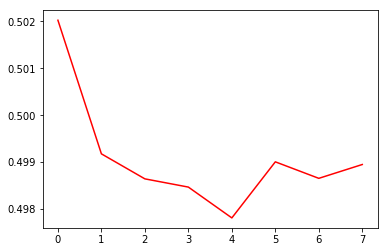

In [11]:
# train the parameters
history = model.fit(x_train, y_train, epochs=8, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()